# Regresión

Vamos a trabajar con el dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (../DataSets/avocado.csv). Parsear fechas con la columna "Date".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
palta = pd.read_csv('../DataSets/avocado.csv', delimiter=',', parse_dates=["Date"])
palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


b. Eliminar la columna "Unnamed: 0".

In [3]:
palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


c. Ordenar el dataframe de manera creciente por fecha.

In [4]:
palta.sort_values("Date", inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


d. Resetear los índices del Dataframe

In [5]:
palta.reset_index(inplace = True, drop  = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


### 2. Análisis exploratorio de datos

a. ¿Cuáles variables son numéricas y cuáles categóricas?¿Hay NaNs?

In [6]:
palta.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

b. ¿Cuántas regiones hay?¿Cuántas entradas por región?

In [7]:
palta.groupby(['region']).count()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,,
Albany,338,338,338,338,338,338,338,338,338,338,338,338
Atlanta,338,338,338,338,338,338,338,338,338,338,338,338
BaltimoreWashington,338,338,338,338,338,338,338,338,338,338,338,338
Boise,338,338,338,338,338,338,338,338,338,338,338,338
Boston,338,338,338,338,338,338,338,338,338,338,338,338
BuffaloRochester,338,338,338,338,338,338,338,338,338,338,338,338
California,338,338,338,338,338,338,338,338,338,338,338,338
Charlotte,338,338,338,338,338,338,338,338,338,338,338,338
Chicago,338,338,338,338,338,338,338,338,338,338,338,338


c. Seleccionar solamente las instancias correspondientes a la region "Chicago".

In [8]:
palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


d. ¿Cómo son los precios de las paltas en función de las distintas variables?

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

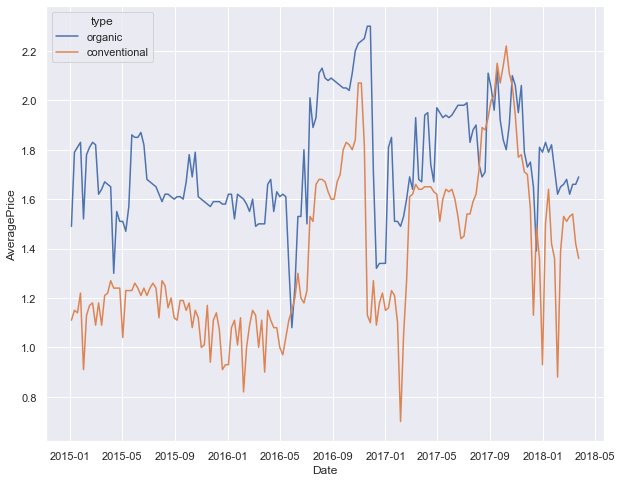

In [9]:
plt.figure(figsize = (10,8))
#sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago)
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, hue = 'type')

**Probar con otras variables**

<AxesSubplot:xlabel='Total Volume', ylabel='4225'>

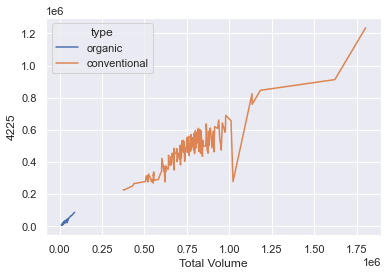

In [10]:
sns.lineplot(x = 'Total Volume', y = '4225', data = palta_chicago, hue = 'type')

#### Pasar fechas a números

A veces, en lugar de trabajar con fechas, es más fácil pasarlas a un número representativo. La siguiente celda se encarga de eso.

In [11]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head()

C:\Users\lopez\AppData\Local\Temp/ipykernel_35860/450473260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


### 3. Modelos de regresión

#### Regresión Lineal 1D

Como ejemplo de este proceso, primero vamos a considerar el caso común de ajustar una línea a datos de la forma $(x, y)$.

Vamos a generar el siguiente dataset para nuestro ejemplo de regresión:

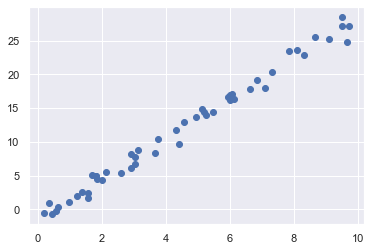

In [12]:
rng = np.random.RandomState(42)
x = 10 * 1 * rng.rand(50)
y = 3 * x - 1.5 + rng.randn(50)

# Ploteamos
plt.scatter(x, y);

Una vez generados los datos, podemos usar la receta estudiada anteriormente. Vamos a recorrer los pasos del proceso: 

#### 1. Seleccionar una "clase de modelo"

En Scikit-Learn, cada clase de modelo se representa con una clase de Python. 

Entonces, por ejemplo, si queremos computar un modelo de regresión lineal simple, podemos importar la clase de regresión lineal de esta forma:

In [13]:
from sklearn.linear_model import LinearRegression

Notar que también existen otros modelos de regresión lineal más generales; Podés leer más acerca de ellos en la [documentación ``sklearn.linear_model``](http://Scikit-Learn.org/stable/modules/linear_model.html). 

#### 2. Elegir los hiperparámetros del modelo

Es importante destacar que *una clase de modelo no es lo mismo que una instancia de modelo*.

Una vez que hemos decidido nuestra clase de modelo, todavía tenemos que tomar algunas decisiones. Dependiendo de la clase de modelo con la que trabajemos, podríamos tener que responder a una o más preguntas como las siguientes:

- ¿Queremos ajustar también un intercepto (intercept = True)?
- ¿Queremos que el modelo esté normalizado?
- ¿Queremos agregar features calculados a partir del input para darle mayor flexibilidad al modelo?
- ¿Qué grado de "regularización" vamos a querer usar en el modelo?

Estos son ejemplos de las importantes decisiones que deben hacerse **una vez que hemos seleccionado la clase de modelo a usar**.

Estas elecciones se representan frecuentemente como *hiperparámetros*, o parámetros que deben ser seteados antes de que el modelo sea ajustado a los datos. 

En Scikit-Learn, los hiperparámetros son elegidos como argumentos en la instanciación del modelo. Exploraremos cómo podemos justificar cuantitativamente la elección de hiperparámetros en las próximas clases.  

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase ``LinearRegression`` y especificar que nos gustaría ajustar el intercepto usando el hiperparámetro ``fit_intercept``: 

In [14]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

**Tener en cuenta**: cuando el modelo es instanciado, la única acción que sucede es almacenar los valores de estos valores de hiperparámetros.

En particular, todavía no hemos aplicado el modelo a ningún dato: la API de Scikit-Learn hace una distinción muy clara entre la *elección del modelo con sus hiperparámetros* y la *aplicación del modelo a los datos*. 

#### 3. Preparar los datos en una matriz de features y un vector de target

Previamente hemos hablado de la representación de datos de Scikit-Learn, la cual requiere una matriz de features de dos dimensiones y un vector target de una dimensión.

Aquí nuestra variable target ``y`` ya se encuentra en un formato correcto (un array de longitud ``n_samples``), pero necesitamos procesar los datos en ``x`` para convertirlos en una matriz de tamaño ``[n_samples, n_features]``.

En este caso, esto se reduce a un simple cambio de forma (reshaping) del array de una dimensión: 

In [15]:
x.shape

(50,)

In [16]:
X = x[:, np.newaxis]
X.shape

# Otra forma de hacerlo
# X = x.reshape(-1,1)

(50, 1)

#### 4. Ajustar el modelo a los datos

Ahora es momento de aplicar nuestro modelo a los datos.
Esto puede hacerse con el método ``fit()`` de nuestra instancia de modelo.

In [17]:
model.fit(X, y)

LinearRegression()

El método ``fit()`` realiza una secuencia de cómputos internos dependientes del modelo, y los resultados de estas operaciones son almacenadas en atributos específicos de la clase de modelo que el usuario luego puede explorar.

En Scikit-learn, por convención, todos los atributos que representan los parámetros de los modelos que fueron aprendidos durante el procesos de entrenamiento con ``fit()``, tienen `underscores` en sus nombres; por ejemplo en este modelo lineal, podemos observar el parámetro coef_ y el parámetro intercept_:

In [18]:
model.coef_

array([2.9776566])

In [19]:
model.intercept_

-1.403310725531119

Estos dos parámetros representan la pendiente y el intercepto del ajuste lineal simple a los datos. 
Comparándolos con la definición del dataset sintético creado al principio del ejemplo, podemos ver que están muy cerca de la pendiente 2 y el intercepto -1 definidos en la fórmula para generar los datos.

Una pregunta que surge frecuentemente se relaciona con incertidumbre o incerteza (uncertainty) en estos parámetros internos del modelo. 

En general, Scikit-Learn no provee herramientas para obtener conclusiones del estado interno de los modelos: interpretar los parámetros de un modelo tiene mucho más que ver con una pregunta de *modelado estadístico* más que una pregunta de *machine learning*.

Machine learning en cambio se enfoca en la calidad con la cual el modelo *predice*.

Si te interesa investigar el significado de los parámetros de ajuste dentro del modelo, existen otras herramientas, incluyendo el paquete de python [Statsmodels](http://statsmodels.sourceforge.net/).

#### 5. Predecir etiquetas para datos desconocidos

Una vez que el modelo es entrenado, la principal tarea en el aprendizaje supervisado es evaluarlo en base a lo que dice acerca de nuevos datos que no fueron parte del **set de entrenamiento**. 

En Scikit-Learn, esto puede hacerse usando el método ``predict()``. 
En el contexto de este ejemplo, nuestro "nuevo dataset" será un vector de valores *x*, y observaremos los valores *y* que el modelo predice.

In [20]:
xfit = np.linspace(0,10) #,50 por defecto

Como antes, necesitamos manipular estos valores *x* en una matriz de features de tamaño ``[n_samples, m_features]``, y recién despueś de este paso podremos utilizarla como argumento para la predicción. 

In [21]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finalmente, vamos a visualizar los resultados ploteando primero los datos originales, y luego el ajuste de nuestro modelo lineal:

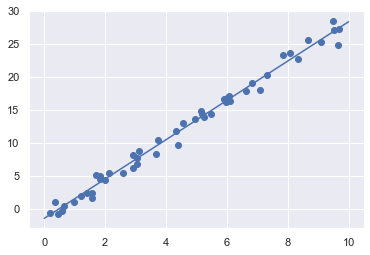

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Vamos a entrenar un modelo de regresión lineal entre la fecha y el precio promedio de las paltas convencionales.

In [23]:
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional']
palta_chicago_convencional.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
6,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago
8,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago


a. Separamos las variables independientes ('Date') y dependientes ('AveragePrice'). Para trabajar con las fechas, la pasamos a números.

In [24]:
X = palta_chicago_convencional.Date.values
y = palta_chicago_convencional.AveragePrice.values
print(X.shape, y.shape)

(169,) (169,)


Hacemos un reshape para X. ¿Por qué?

In [25]:
X = X.reshape(-1,1)
print(X.shape)

(169, 1)


b. Separamos en train/test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(118, 1)
(51, 1)
(118,)
(51,)


c. Implementamos y entrenamos el modelo de regresión lineal

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)

LinearRegression()

¿Qué aprendió?

In [28]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[0.00056287]
-413.0159400717028
1


Predecimos sobre los datos de train y de test.

In [29]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.06683659694304836
Error en datos de test: 0.07058370188138195


Graficamos

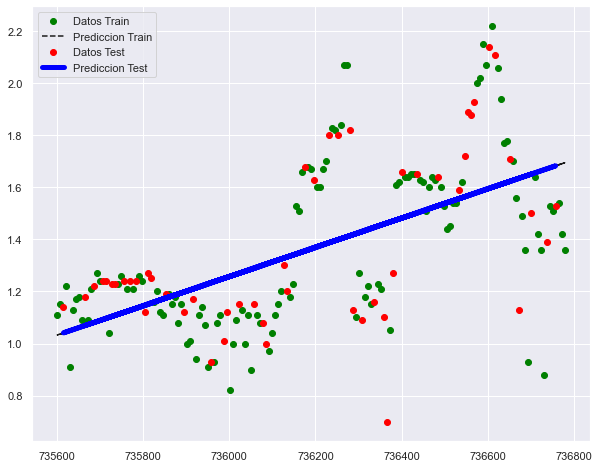

In [30]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()
